# Homework 1 (100 points)

The goal of this homework is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops

look through the pandas documentation for alternatives.

## Exercise 1 (60 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

a) Write a function that reads in a filepath to a csv and returns the DataFrame. (5 points)

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import math


df = pd.read_csv('train.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Write a function that returns the number of rows that have at least one empty column value - (2.5 points)

In [48]:
def num_nans(df):
    empty = 0
    for row in range(len(df)):
        if(df.iloc[[row]].isna().sum().sum() != 0):
            empty +=1
    return empty

                

print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


c) Write a function that removes all columns with more than 200 NaN values - (2.5 points)

In [49]:
def drop_na(df):
    df.drop(columns = df.loc[:,(df.isnull().sum(axis=0) > 200)].columns.values, inplace = True)
    return df

df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Write a function that replaces `male` with 0 and `female` with 1 - (2.5 points)

In [50]:
def to_numerical(df):
    df['Sex'].replace('male', 0, inplace = True)
    df['Sex'].replace('female', 1 , inplace = True)
    return df['Sex']
df['Sex'] = to_numerical(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e)  Write a function that adds four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column. - (5 points) 

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [59]:
def extract_names(df):
    length = len(df['Name'])
    df['First Name'] = [None]*length
    df['Last Name'] = [None]*length
    df['Middle Name'] = [None]*length
    df['Title'] = [None]*length
    for i in range(length):
        full_n = df.at[i,'Name']
        arr_n = full_n.split(',')
        df.at[i,'Last Name'] = arr_n[0]
        new_arr = arr_n[1].split()
        df.at[i,'Title'] = new_arr[0]
        if len(new_arr) == 2:
            df.at[i,'First Name'] = new_arr[1]
        elif len(new_arr) == 3:
            df.at[i,'First Name'] = new_arr[1]
            df.at[i,'Middle Name'] = new_arr[2]         
    return df[['First Name', 'Middle Name', 'Last Name', 'Title']]
df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Last Name,Middle Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,None,Braund,None,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,None,Cumings,None,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,Heikkinen,Laina,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,None,Futrelle,None,Mrs.
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,None,Allen,None,Mr.


f) Write a function that replaces all missing ages with the average age - (2.5 points)

In [52]:
#fill na
def replace_with_mean(df):
    sum = df['Age'].sum()
    length = len(df['Age'])
    avg = (int)(sum/length)

    df['Age'].fillna(avg)
    return df['Age']
df['Age'] = replace_with_mean(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Last Name,Middle Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Braund,Harris,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,None,Cumings,None,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,Heikkinen,None,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,None,Futrelle,None,Mrs.
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Allen,Henry,Mr.


The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.

g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (2.5 points)

<function matplotlib.pyplot.show(close=None, block=None)>

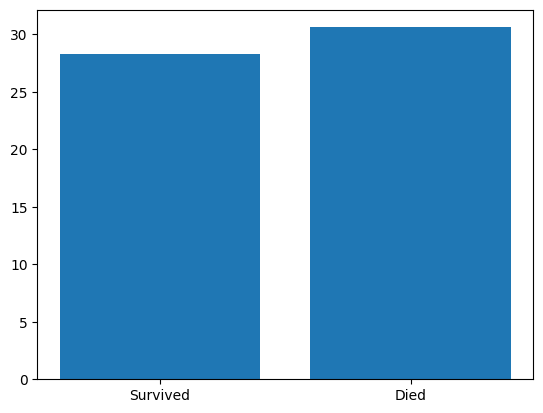

In [53]:
survive = df[df['Survived'] == 1]['Age'].mean()
died = df[df['Survived']== 0]['Age'].mean()

plt.subplot().bar(['Survived', 'Died'],[survive, died])
plt.show

about the same amount died as the amount that survived which was only slightly less 

h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (2.5 points)

<function matplotlib.pyplot.show(close=None, block=None)>

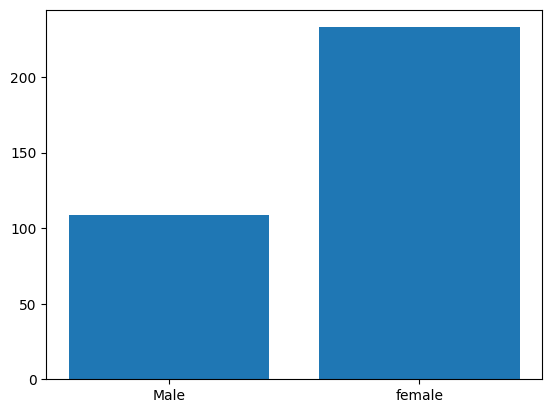

In [54]:
survived = df[df['Survived'] == 1]

surviveM = len(survived[survived['Sex'] == 0 ])
surviveW = len(survived[survived['Sex'] == 1 ])
plt.subplot().bar(['Male', 'female',],[surviveM, surviveW])
plt.show

there seems to be at least double the amount of female data than male

i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (5 points)

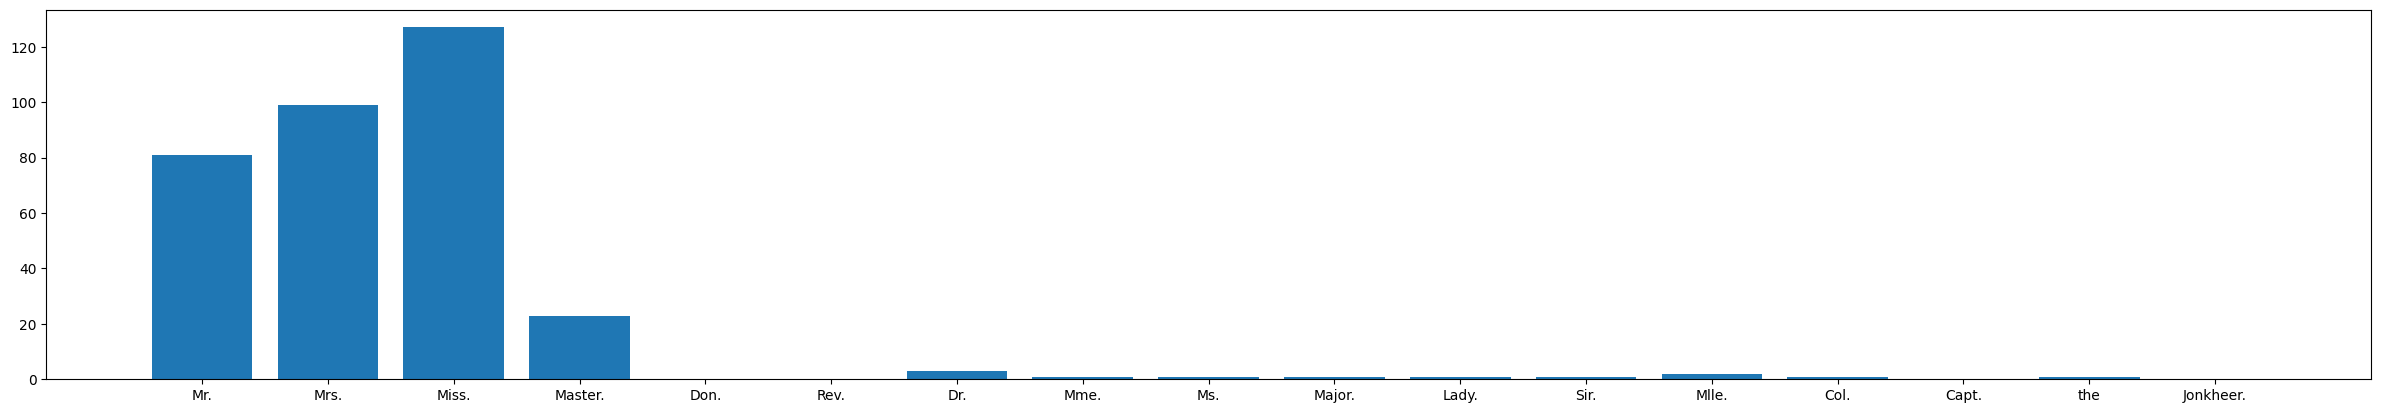

In [55]:
titles = list(df['Title'].unique())
proportions = []
for title in titles:
    titledf = df[df['Title'] == title]
    survived = len(titledf[titledf['Survived']== 1])
    proportions += [survived]

plt.figure(figsize =[30, 4.8])
plt.subplot().bar(titles, proportions, label = 'i')
plt.show()


the most common title is Miss then Mrs, followed by mr and for some reason master

j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

<function matplotlib.pyplot.show(close=None, block=None)>

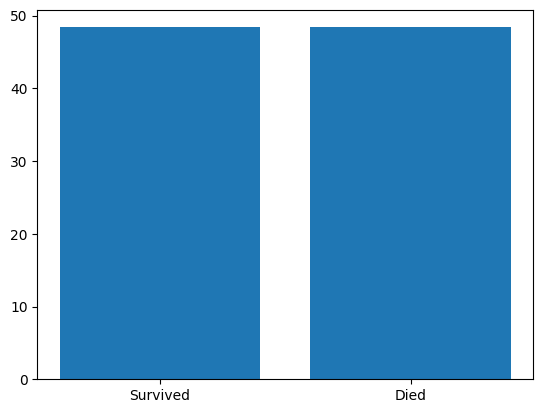

In [56]:
survived_fare = df[df['Survived'] == 1]['Fare'].mean()
died_fare = df[df['Survived'] == 1]['Fare'].mean()

plt.subplot().bar(['Survived', "Died"], [survived_fare, died_fare])
plt.show


About the same amount survived and died 

k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

In [57]:
survived_fare = df[df['Survived'] == 1]['Fare'].values
died_fare = df[df['Survived'] == 0]['Fare'].values
fig, (ax1, ax2) = plt.subplot(1,2,figsize = (10,10))
ax1.boxplot(survived_fare)
ax2.boxplot(died_fare)
plt.show()

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 640x480 with 0 Axes>

-> your answer here

k) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2.5 points)

In [ ]:
# your code here
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Last Name,Middle Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Braund,Harris,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,None,Cumings,None,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,Heikkinen,None,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,None,Futrelle,None,Mrs.
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Allen,Henry,Mr.


l) Remove all non-numerical columns from the dataframe. - (2.5 points)

In [ ]:
df = #<your code here>


SyntaxError: invalid syntax (2414987893.py, line 1)

m) Ignoring passenger ID, write a function that returns the names of the N most similar pairs of passengers using the euclidean distance? - (15 points)

In [ ]:
def N_most_similar_pairs(df, N):
    return # < your code here >

print("The 3 most similar passengers are: " + str(N_most_similar_pairs(df, 3)))

## Exercise 2 - (40 points)

Another way to get data is by using APIs. Here we will be using the google books API (https://developers.google.com/books/docs/overview)

a) Create a list with these topic strings: Python; Data Science; Data Analysis; Machine Learning; and Deep 
Learning. Use these topics, one at a time, to query the Google Books API by modifying the code below. - (5 points)

In [ ]:
import requests
import json
import pandas as pd

"""
    Google Books Api
    See: https://developers.google.com/books/
"""

def get(topic=""):
    BASEURL = 'https://www.googleapis.com/books/v1/volumes'
    headers = {'Content-Type': 'application/json'}

    response = requests.get(BASEURL + "?q=" + topic, headers=headers)

    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))
    print("Nothing Found")
    return response

python = get("Python")
data_science = get("Data Science")
data_analytics = get("Data Analytics")
machine_learning = get("Machine Learning")
deep_learning = get("Deep Learning")

b) For each returned JSON string: Convert the JSON string to a dict using `loads( )` then use this to convert it to a DataFrame: `pd.json_normalize( thedict['items'] )`. Then save them as `.csv`. - (5 points)

In [ ]:
p1 = json.dumps(python)
python = json.loads(p1)
pythondf = pd.json_normalize(python['items'])

data = json.dumps(data_science)
data_science = json.loads(data)
data_sciencedf = pd.json_normalize(data_science['items'])

analytics = json.dumps(data_analytics)
data_analytics = json.loads(analytics)
data_analyticsdf = pd.json_normalize(data_analytics['items'])

machine = json.dumps(machine_learning)
machine_learning = json.loads(machine)
machine_learningdf = pd.json_normalize(machine_learning['items'])

deep = json.dumps(deep_learning)
deep_learning = json.loads(deep)
deep_learningdf = pd.json_normalize(deep_learning['items'])

pythondf.to_csv()
data_sciencedf.to_csv()
data_analyticsdf.to_csv()
machine_learningdf.to_csv()
deep_learningdf.to_csv()



c) For each DataFrame, relabel `volumeInfo.title` as `Title` and `volumeInfo.authors` as `Authors`. - (5 points)

In [ ]:
pythondf.rename(columns = {'volumeInfo.title': 'Title', 'volumeInfo.authors': "Authors"}, inplace = True)

data_sciencedf.rename(columns = {'volumeInfo.title': 'Title', 'volumeInfo.authors': "Authors"}, inplace = True)

data_analyticsdf.rename(columns = {'volumeInfo.title': 'Title', 'volumeInfo.authors': "Authors"}, inplace = True)

machine_learningdf.rename(columns = {'volumeInfo.title': 'Title', 'volumeInfo.authors': "Authors"}, inplace = True)

deep_learningdf.rename(columns = {'volumeInfo.title': 'Title', 'volumeInfo.authors': "Authors"}, inplace = True)


d) For each DataFrame create a new column called `Topic` with the name of the topic from the API query above. Then merge all DataFrames into one and save it to a new `.csv` file. - (10 points)

In [ ]:

python_list = ["Python","Python","Python","Python","Python","Python","Python","Python","Python","Python"]
pythondf['Topic'] = python_list

ds_list = ["Data Science","Data Science","Data Science","Data Science","Data Science","Data Science","Data Science","Data Science","Data Science","Data Science"]
data_sciencedf['Topic'] = ds_list

da_list = ["Data Analytics","Data Analytics","Data Analytics","Data Analytics","Data Analytics","Data Analytics","Data Analytics","Data Analytics","Data Analytics","Data Analytics"]
data_analyticsdf['Topic'] = da_list

ml_list = ["Machine Learning","Machine Learning","Machine Learning","Machine Learning","Machine Learning","Machine Learning","Machine Learning","Machine Learning","Machine Learning","Machine Learning"]
machine_learningdf['Topic'] = ml_list

dl_list = ["Deep Learning","Deep Learning","Deep Learning","Deep Learning","Deep Learning","Deep Learning","Deep Learning","Deep Learning","Deep Learning","Deep Learning"]
deep_learningdf['Topic'] = dl_list

list_of_dfs = [pythondf, data_sciencedf,data_analyticsdf,machine_learningdf,deep_learningdf]
maindf = result = pd.concat(list_of_dfs)
maindf.to_csv()


e) Write a function that returns all rows whose `Title` contains the word `Data` (case incensitive). - (5 points)

In [62]:
def titleData():
    data_rows = maindf.loc[maindf['Title'] == 'Data']
    return data_rows

f) Write a function that returns all rows whose `Authors` first or last name starts with the letter `E` - (10 points)

In [64]:
def author_letter(df):
    exploded= df.explode('Authors', ignore_index = True)
    authors = exploded.loc[exploded['Authors'].str.contains('E')]
    return authors
author = author_letter(df)


KeyError: 'Authors'